# PCA for Classification Dataset

In [1]:
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

import seaborn as sns

import numpy as np
import pandas as pd

from mlrept_explain import DecompositionReporter

sns.set(style="dark")

seed = 1234

%load_ext autoreload
%autoreload 2

## Fetch dataset

In [2]:
# WineDataset
# See: https://www.openml.org/search?type=data&status=active&id=43571
data = fetch_openml(data_id=43571, as_frame=True)
X = data.data.drop(columns="Wine")
y = data.data["Wine"].astype(int)

## Split dataset

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [4]:
display(X_train)
display(y_train)

,Alcohol,Malic_Acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
54,13.74,1.67,2.25,16.4,118.0,2.60,2.90,0.21,1.62,5.85,0.92,3.20,1060.0
144,12.25,3.88,2.20,18.5,112.0,1.38,0.78,0.29,1.14,8.21,0.65,2.00,855.0
27,13.30,1.72,2.14,17.0,94.0,2.40,2.19,0.27,1.35,3.95,1.02,2.77,1285.0
40,13.56,1.71,2.31,16.2,117.0,3.15,3.29,0.34,2.34,6.13,0.95,3.38,795.0
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,13.11,1.90,2.75,25.5,116.0,2.20,1.28,0.26,1.56,7.10,0.61,1.33,425.0
116,11.82,1.47,1.99,20.8,86.0,1.98,1.60,0.30,1.53,1.95,0.95,3.33,495.0
53,13.77,1.90,2.68,17.1,115.0,3.00,2.79,0.39,1.68,6.30,1.13,2.93,1375.0
38,13.07,1.50,2.10,15.5,98.0,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020.0


54     1
144    3
27     1
40     1
173    3
      ..
152    3
116    2
53     1
38     1
47     1
Name: Wine, Length: 142, dtype: int64

In [5]:
display(X_test)
display(y_test)

,Alcohol,Malic_Acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
111,12.52,2.43,2.17,21.0,88.0,2.55,2.27,0.26,1.22,2.00,0.90,2.78,325.0
123,13.05,5.80,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380.0
63,12.37,1.13,2.16,19.0,87.0,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420.0
88,11.64,2.06,2.46,21.6,84.0,1.95,1.69,0.48,1.35,2.80,1.00,2.75,680.0
141,13.36,2.56,2.35,20.0,89.0,1.40,0.50,0.37,0.64,5.60,0.70,2.47,780.0
94,11.62,1.99,2.28,18.0,98.0,3.02,2.26,0.17,1.35,3.25,1.16,2.96,345.0
147,12.87,4.61,2.48,21.5,86.0,1.70,0.65,0.47,0.86,7.65,0.54,1.86,625.0
43,13.24,3.98,2.29,17.5,103.0,2.64,2.63,0.32,1.66,4.36,0.82,3.00,680.0
51,13.83,1.65,2.60,17.2,94.0,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265.0
164,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0


111    2
123    2
63     2
88     2
141    3
94     2
147    3
43     1
51     1
164    3
168    3
61     2
31     1
79     2
108    2
39     1
9      1
175    3
148    3
137    3
48     1
59     2
122    2
138    3
119    2
165    3
25     1
58     1
6      1
101    2
29     1
83     2
66     2
129    2
121    2
91     2
Name: Wine, dtype: int64

## Understand model and data  by Reporter

In [6]:
model = PCA(n_components=4, svd_solver="full")
model.fit(X_train)

feature_name_map = {
    "OD280/OD315_of_diluted_wines": "OD280/OD315"
}

reporter = DecompositionReporter(model, feature_name_map=feature_name_map)
reporter.fit(X_train, y_train)

### Visualize model by pandas.DataFrame

In [7]:
df_evr = pd.DataFrame(
    model.explained_variance_ratio_,
    columns=["explained_variance_ratio"],
    index=np.arange(1, model.n_components_ + 1)
)
df_evr.style.bar(vmin=0, vmax=1)

,explained_variance_ratio
1,0.998025
2,0.001812
3,0.000087
4,0.000051


### Visualize by Reporeter Plots

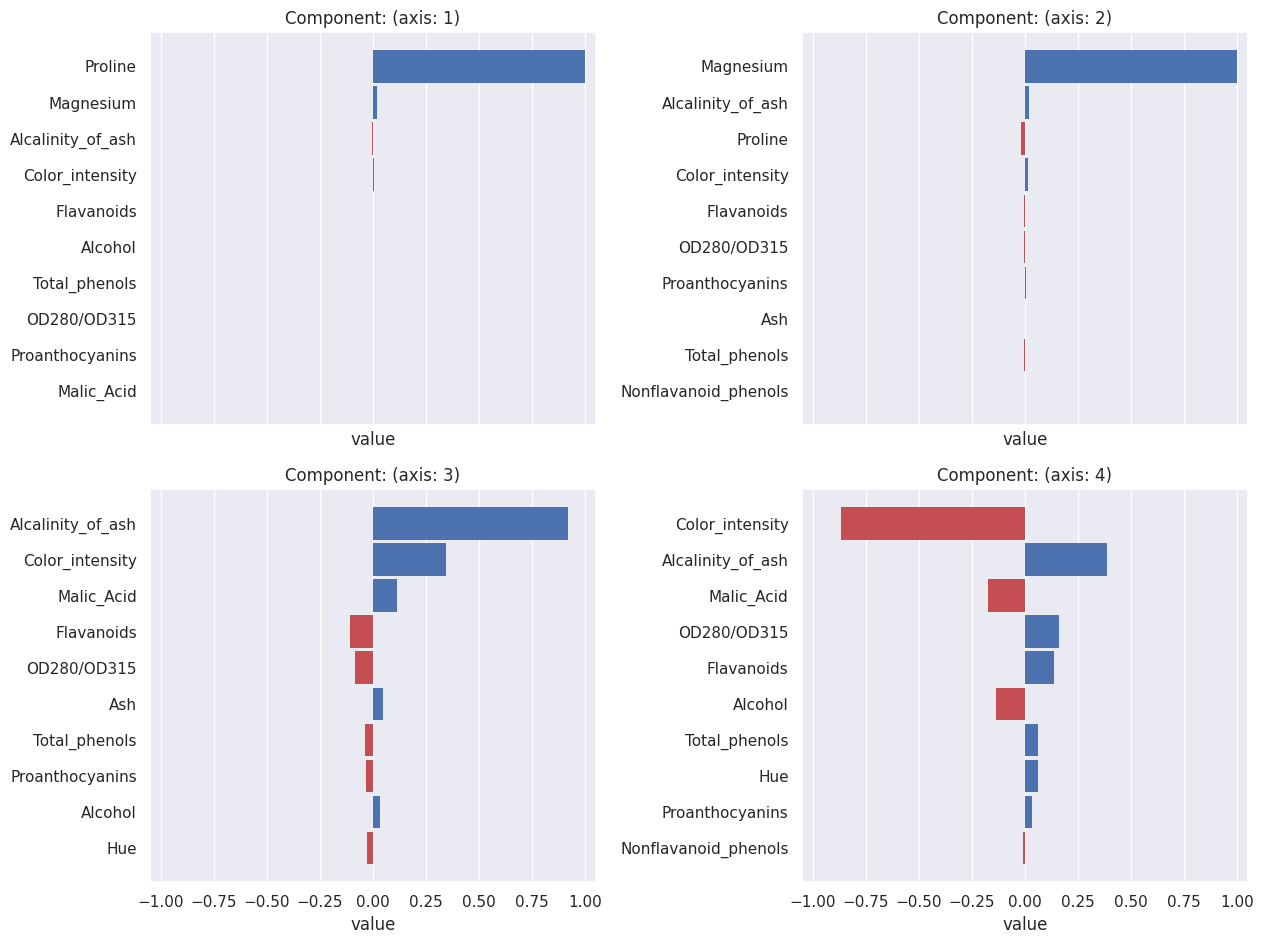

In [8]:
reporter.show("comp")

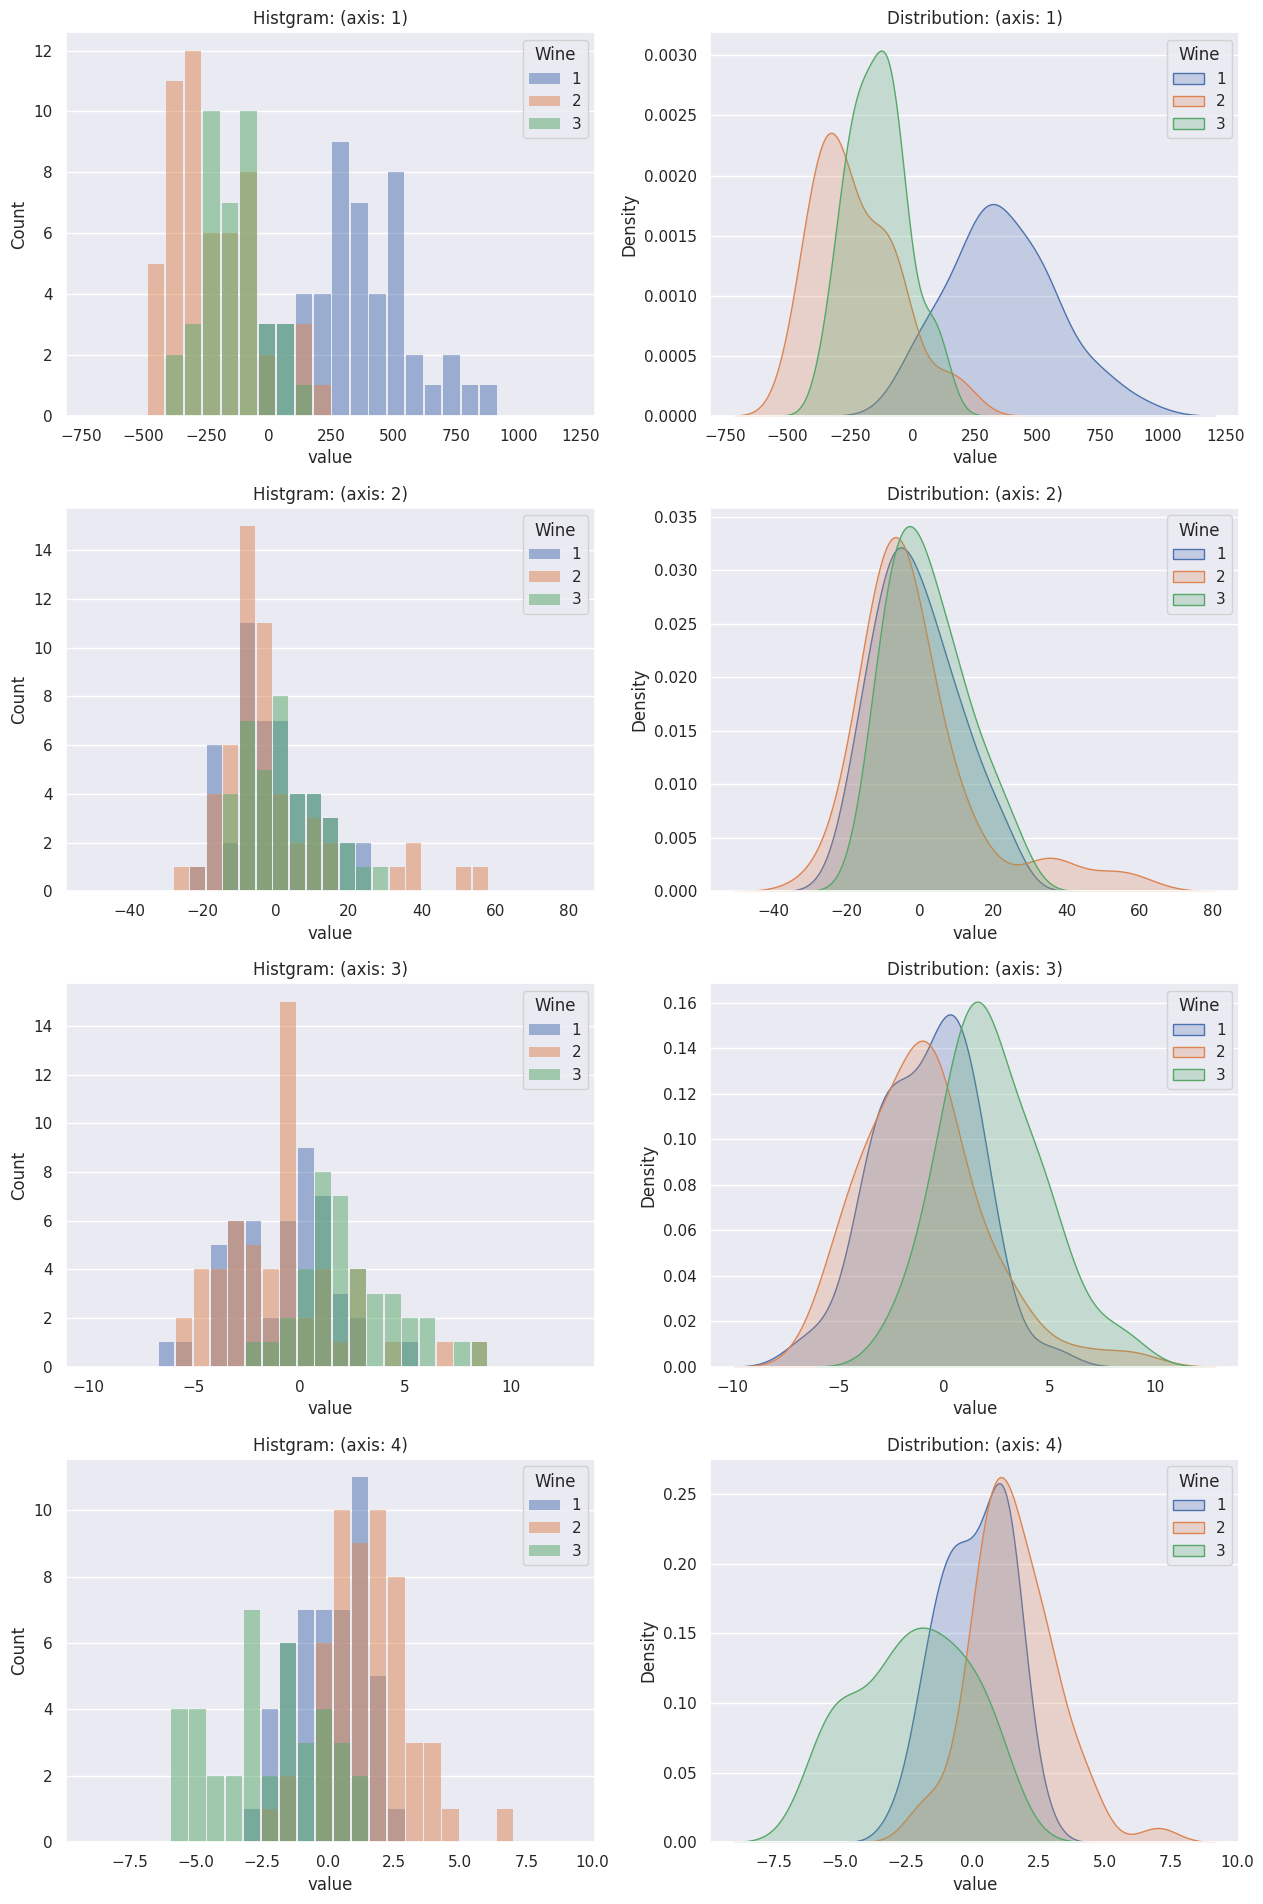

In [9]:
reporter.show_train("dist")

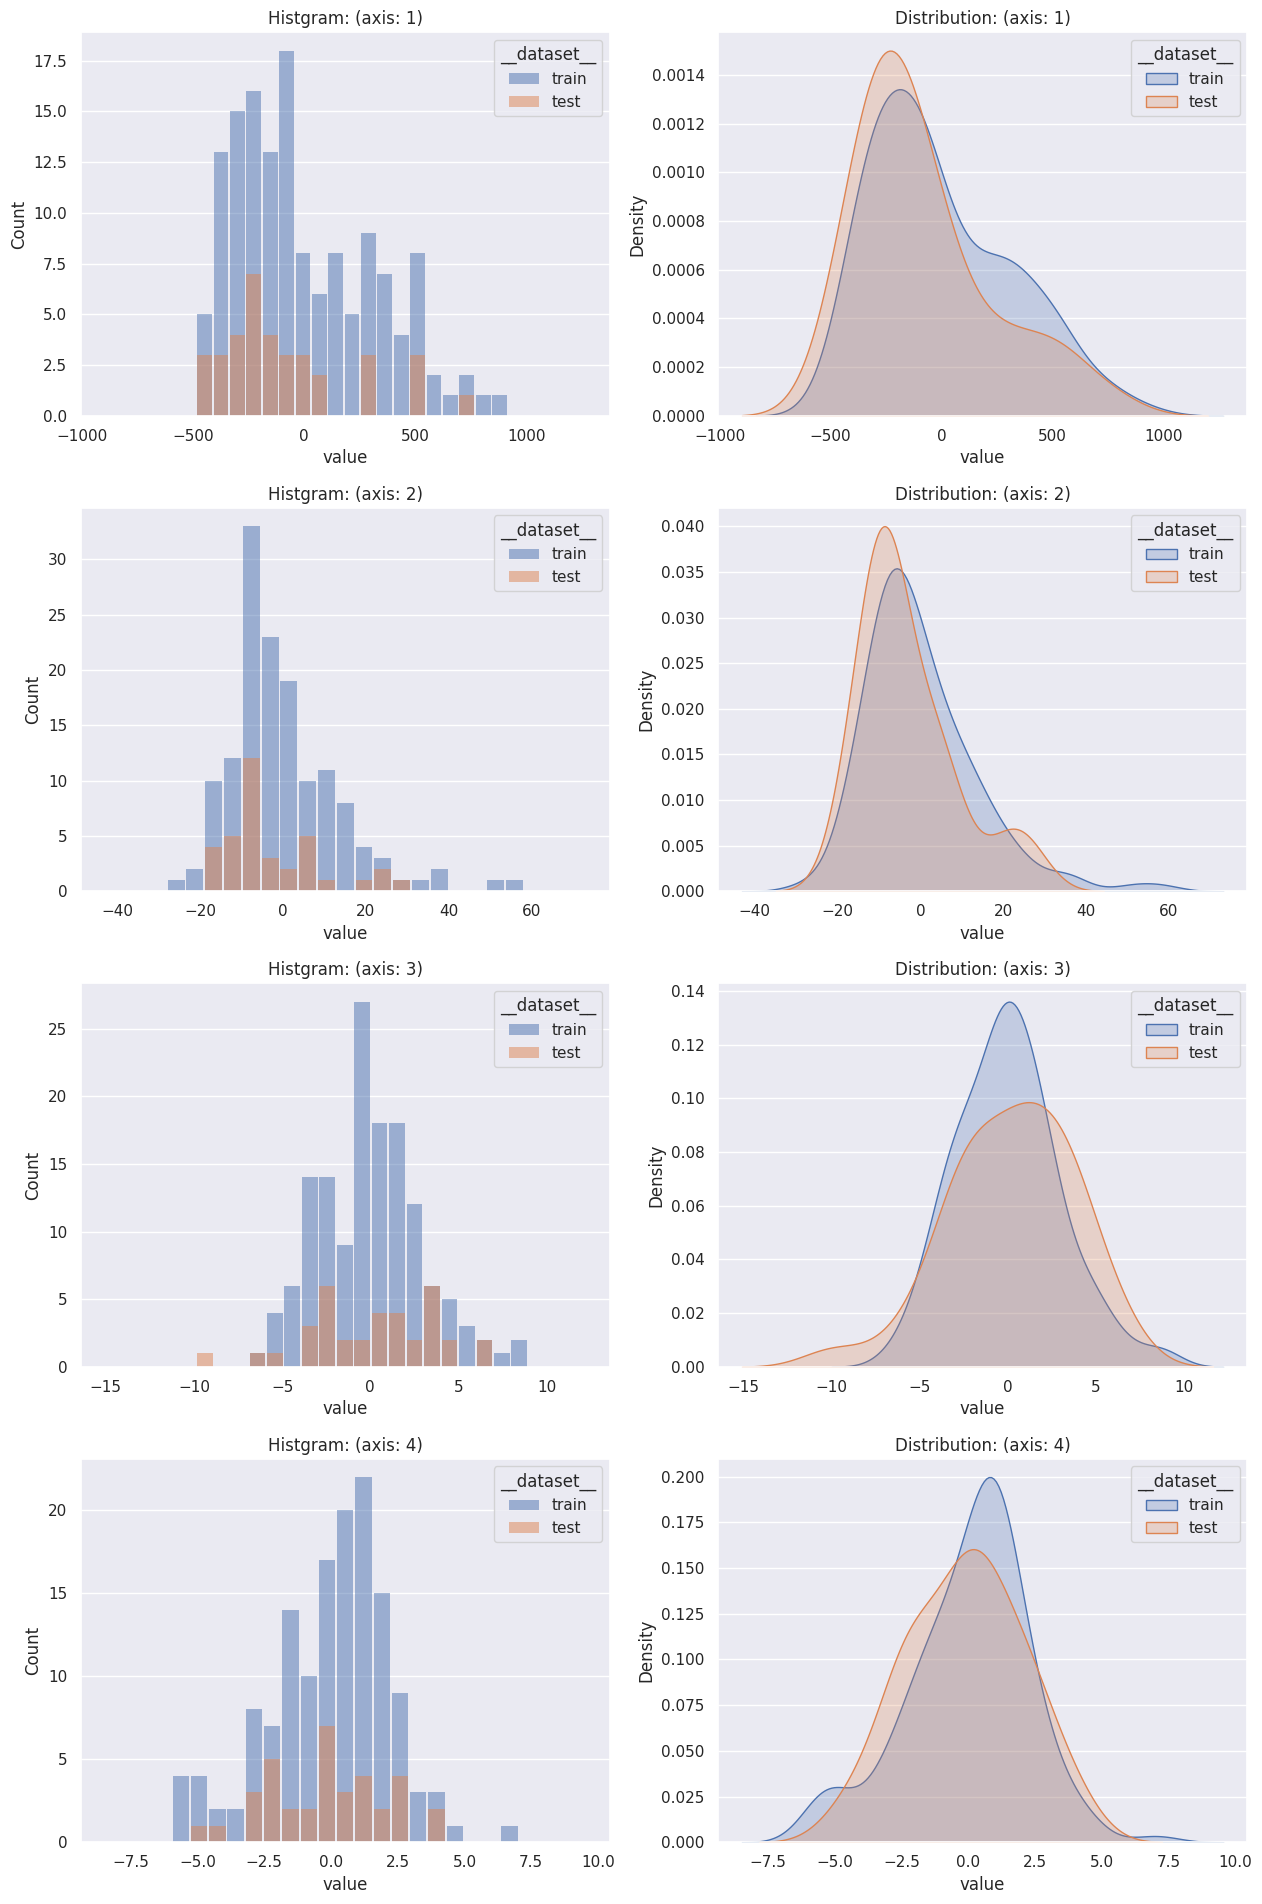

In [10]:
reporter.compare_train("dist", X_test, dataset_name="test")